<a href="https://colab.research.google.com/github/atman-git-123/Deep-Learning-Journey/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train #labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

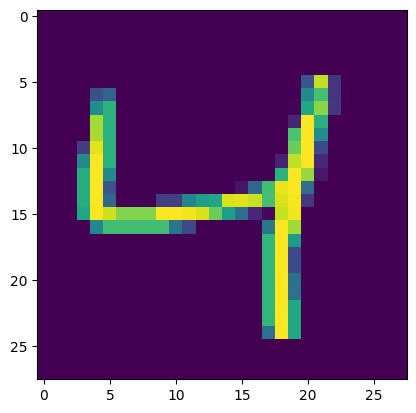

In [13]:
#Pixel value can be converted into image
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [14]:
#PIXEL CAN BE CONVERTED INTO 0 AND 1 BECAUSE MODEL CAN BE WELL TRAINED
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
model = Sequential()
#These line can be converted into 1d array
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
#Output Layer
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
#sparse_categorical_crossentropy can be used for not convert into one hot encoding
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [43]:
from sklearn import metrics
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8497 - loss: 0.5184 - val_accuracy: 0.9526 - val_loss: 0.1604
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9626 - loss: 0.1228 - val_accuracy: 0.9668 - val_loss: 0.1092
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9744 - loss: 0.0846 - val_accuracy: 0.9703 - val_loss: 0.1053
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9816 - loss: 0.0594 - val_accuracy: 0.9657 - val_loss: 0.1176
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9851 - loss: 0.0499 - val_accuracy: 0.9712 - val_loss: 0.0993
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9876 - loss: 0.0390 - val_accuracy: 0.9753 - val_loss: 0.0901
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9903 - loss: 0.0292 - val_accuracy: 0.9725 - val_loss: 0.1062
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9916 - loss: 0.0245 - 

In [44]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.01001693e-19, 7.24678520e-12, 4.82342085e-13, ...,
        9.99999940e-01, 5.01892485e-16, 1.91996874e-12],
       [4.62544339e-26, 1.04897495e-07, 9.99999821e-01, ...,
        1.79052197e-24, 5.16538182e-15, 2.20577915e-29],
       [1.25570110e-14, 9.99994338e-01, 9.39408437e-07, ...,
        9.90463533e-08, 4.30485852e-06, 1.27094116e-11],
       ...,
       [2.36815408e-21, 3.15454591e-17, 2.16887524e-21, ...,
        6.73515538e-15, 2.25738780e-16, 3.12919585e-14],
       [2.31958674e-10, 7.55589811e-20, 5.36697787e-19, ...,
        1.58295033e-09, 2.57944322e-07, 2.51880644e-24],
       [8.19222411e-19, 1.89748689e-21, 8.15141015e-21, ...,
        2.34853871e-24, 1.93043728e-20, 1.90651366e-20]], dtype=float32)

In [45]:
y_prob = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [46]:
y_prob

array([[3.01001693e-19, 7.24678520e-12, 4.82342085e-13, ...,
        9.99999940e-01, 5.01892485e-16, 1.91996874e-12],
       [4.62544339e-26, 1.04897495e-07, 9.99999821e-01, ...,
        1.79052197e-24, 5.16538182e-15, 2.20577915e-29],
       [1.25570110e-14, 9.99994338e-01, 9.39408437e-07, ...,
        9.90463533e-08, 4.30485852e-06, 1.27094116e-11],
       ...,
       [2.36815408e-21, 3.15454591e-17, 2.16887524e-21, ...,
        6.73515538e-15, 2.25738780e-16, 3.12919585e-14],
       [2.31958674e-10, 7.55589811e-20, 5.36697787e-19, ...,
        1.58295033e-09, 2.57944322e-07, 2.51880644e-24],
       [8.19222411e-19, 1.89748689e-21, 8.15141015e-21, ...,
        2.34853871e-24, 1.93043728e-20, 1.90651366e-20]], dtype=float32)

In [47]:
y_pred=y_prob.argmax(axis=1)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778

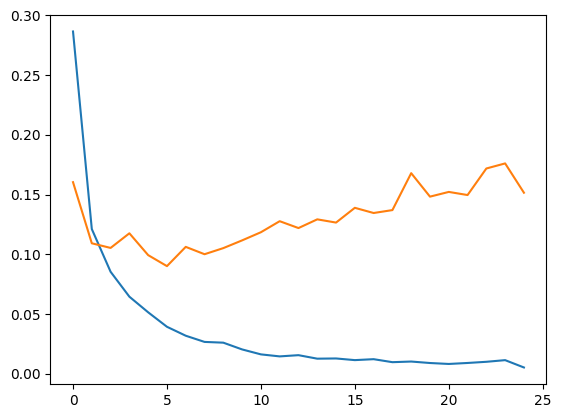

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

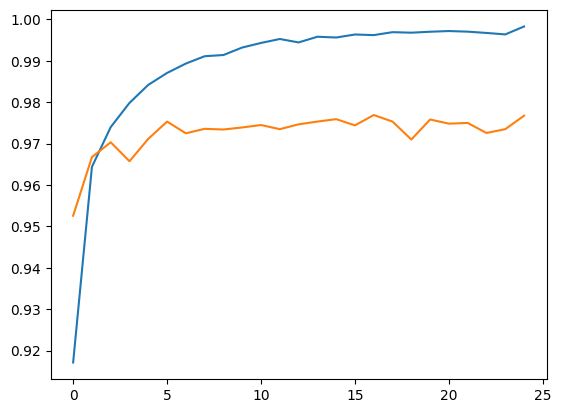

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

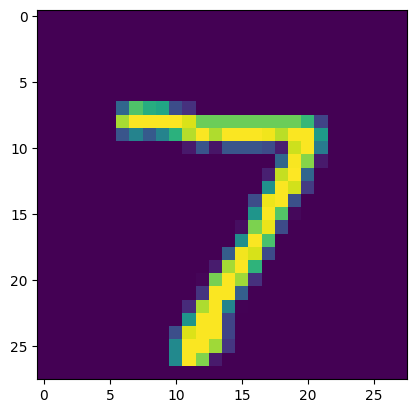

In [58]:
plt.imshow(X_test[0])

In [59]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([7])